# Load Packages and Data


In [71]:
# Import necessary modules

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Load the data
df = pd.read_csv('Data_Leakage_Detection.csv')

# Data Previewing and Analysis

In [6]:
df.head(10)

,id,date,user,pc,Authority,Through_pwd,Through_pin,Through_MFA,Data Modification,Confidential Data Access,Confidential File Transfer,External Destination,File Operation,Data Sensitivity Level,Abnormality
0,1,07-10-14 0:54,User_0971,PC_0258,manager,0.0,0.0,1.0,0.0,0.0,1.0,internal,move,low,0
1,2,02-01-13 18:08,User_0208,PC_0307,staff,1.0,0.0,0.0,1.0,0.0,0.0,external,write,low,1
2,3,08-08-11 20:31,User_0265,PC_0259,manager,0.0,0.0,1.0,1.0,0.0,1.0,internal,write,low,0
3,4,2/26/2020 12:43,User_0178,PC_0154,staff,0.0,1.0,0.0,0.0,1.0,1.0,internal,move,high,0
4,5,3/13/2012 9:26,User_0556,PC_0095,senior manager,0.0,0.0,1.0,0.0,1.0,0.0,external,read,high,0
5,6,12/23/2019 23:34,User_0508,PC_0259,staff,0.0,0.0,1.0,0.0,1.0,1.0,external,move,medium,1
6,7,4/22/2015 2:54,User_0648,PC_0242,staff,0.0,1.0,0.0,0.0,0.0,0.0,external,read,medium,1
7,8,12/22/2018 18:47,User_0123,PC_0037,staff,1.0,1.0,1.0,0.0,NaN,0.0,external,move,high,1
8,9,01-10-21 18:02,User_0437,PC_0082,senior manager,0.0,1.0,1.0,0.0,0.0,0.0,external,delete,medium,0
9,10,4/19/2016 16:02,User_0034,PC_0340,senior manager,0.0,0.0,1.0,0.0,1.0,1.0,external,move,medium,0


In [7]:
df.shape

(49500, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49500 entries, 0 to 49499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          49500 non-null  int64  
 1   date                        49003 non-null  object 
 2   user                        49004 non-null  object 
 3   pc                          49002 non-null  object 
 4   Authority                   49007 non-null  object 
 5   Through_pwd                 49002 non-null  float64
 6   Through_pin                 49006 non-null  float64
 7   Through_MFA                 49147 non-null  float64
 8   Data Modification           49006 non-null  float64
 9   Confidential Data Access    49000 non-null  float64
 10  Confidential File Transfer  49005 non-null  float64
 11  External Destination        49006 non-null  object 
 12  File Operation              49006 non-null  object 
 13  Data Sensitivity Level      490

Remove missing rows

In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43560 entries, 0 to 49499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          43560 non-null  int64  
 1   date                        43560 non-null  object 
 2   user                        43560 non-null  object 
 3   pc                          43560 non-null  object 
 4   Authority                   43560 non-null  object 
 5   Through_pwd                 43560 non-null  float64
 6   Through_pin                 43560 non-null  float64
 7   Through_MFA                 43560 non-null  float64
 8   Data Modification           43560 non-null  float64
 9   Confidential Data Access    43560 non-null  float64
 10  Confidential File Transfer  43560 non-null  float64
 11  External Destination        43560 non-null  object 
 12  File Operation              43560 non-null  object 
 13  Data Sensitivity Level      43560 no

Transform column types

In [11]:
df['date'] = pd.to_datetime(df['date'])

<ipython-input-11-e8d2d516eb0e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [12]:
df[['Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer', 'Abnormality']] = df[['Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer', 'Abnormality']].astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43560 entries, 0 to 49499
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          43560 non-null  int64         
 1   date                        43560 non-null  datetime64[ns]
 2   user                        43560 non-null  object        
 3   pc                          43560 non-null  object        
 4   Authority                   43560 non-null  object        
 5   Through_pwd                 43560 non-null  int64         
 6   Through_pin                 43560 non-null  int64         
 7   Through_MFA                 43560 non-null  int64         
 8   Data Modification           43560 non-null  int64         
 9   Confidential Data Access    43560 non-null  int64         
 10  Confidential File Transfer  43560 non-null  int64         
 11  External Destination        43560 non-null  object        


## Uni-variate analysis

### Continuous data

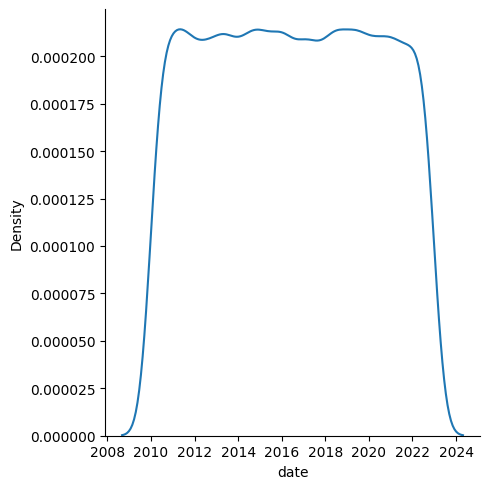

In [14]:
sns.displot(df, x='date', kind="kde")

### Nominal Data

In [15]:
df['user'].value_counts()

,count
user,
User_0269,71
User_0117,65
User_0057,65
User_0119,65
User_0734,64
...,...
User_0586,27
User_0150,25
User_0965,25


In [16]:
df['pc'].value_counts()

,count
pc,
PC_0272,117
PC_0480,115
PC_0069,115
PC_0045,114
PC_0354,113
...,...
PC_0100,64
PC_0302,64
PC_0027,63


<Axes: xlabel='Authority', ylabel='count'>

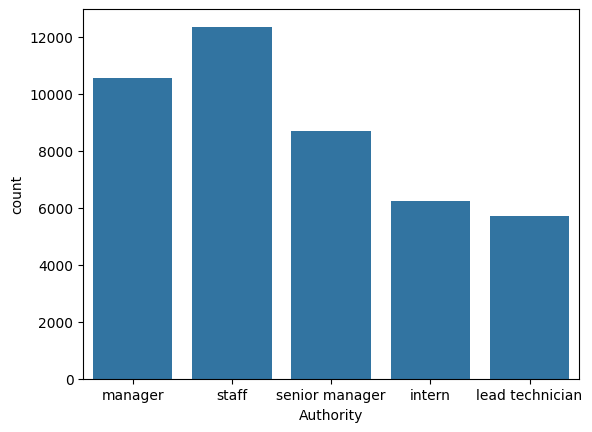

In [17]:
sns.countplot(data=df, x='Authority')

<Axes: xlabel='File Operation', ylabel='count'>

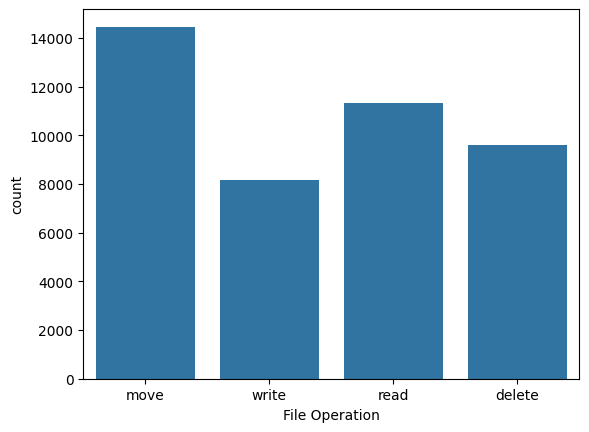

In [18]:
sns.countplot(data=df, x='File Operation')

### Ordinal Data

<Axes: xlabel='Data Sensitivity Level', ylabel='count'>

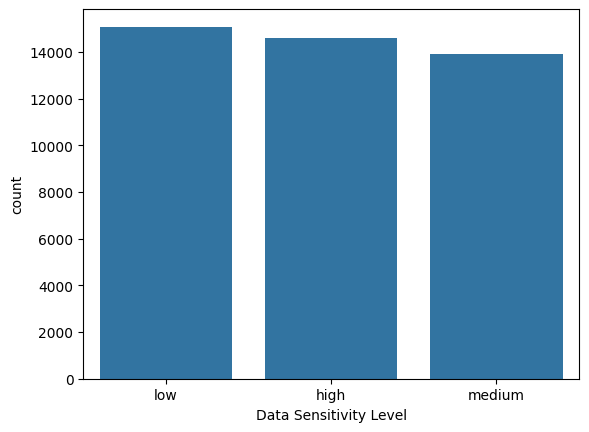

In [19]:
sns.countplot(data=df, x='Data Sensitivity Level')

### Binary data
- Through_pwd
- Through_pin
- Through_MFA
- Data Modification
- Confidential Data Access
- Confidential File Transfer
- External Destination
- Abnormality

In [20]:
df['External Destination'].value_counts(normalize=True)

,proportion
External Destination,
internal,0.597337
external,0.402663


In [21]:
(
    df[['Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer', 'Abnormality']]
    .apply(lambda col: col.value_counts(normalize=True), axis=0)
)

,Through_pwd,Through_pin,Through_MFA,Data Modification,Confidential Data Access,Confidential File Transfer,Abnormality
0,0.729614,0.716827,0.512029,0.612144,0.666253,0.455257,0.687948
1,0.270386,0.283173,0.487971,0.387856,0.333747,0.544743,0.312052


## Multi-variate analysis

### Continuous data

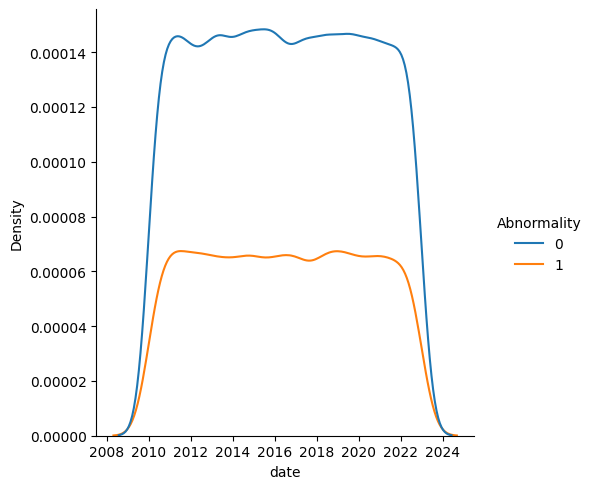

In [22]:
sns.displot(df, x='date', hue='Abnormality', kind="kde")

### Categorical data

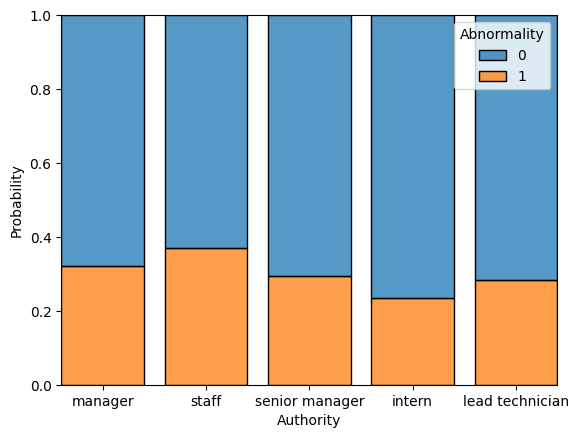

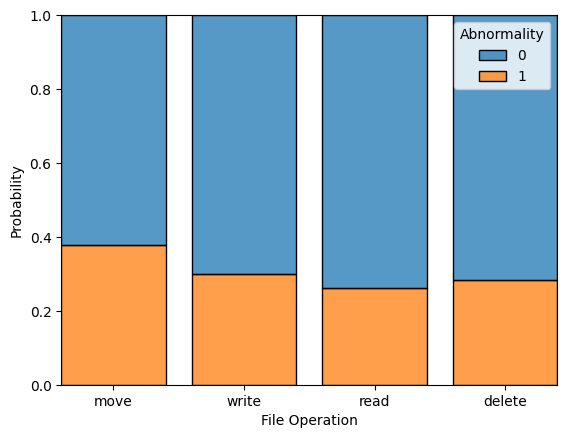

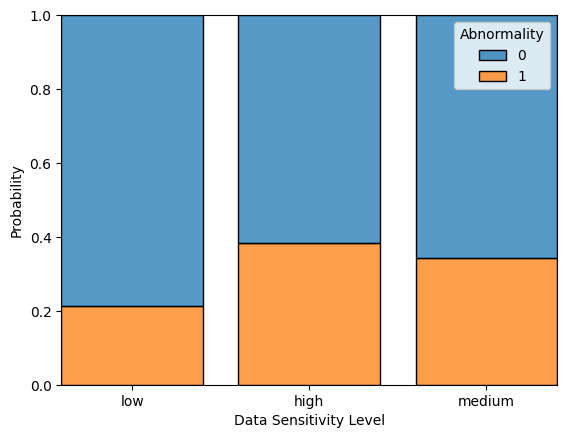

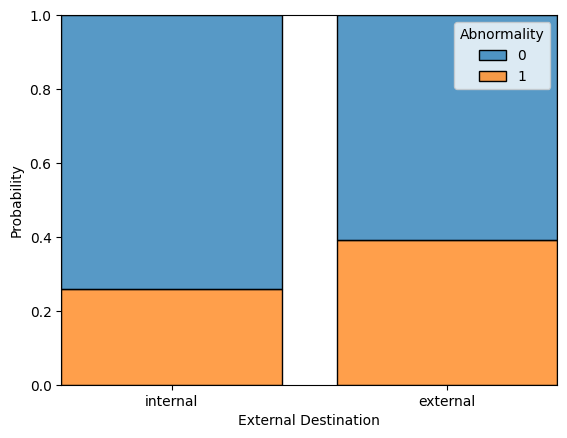

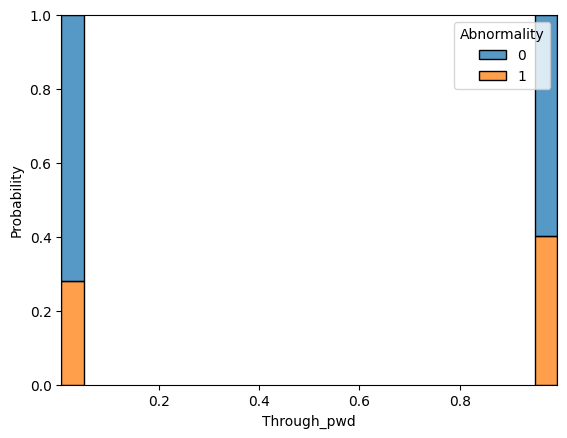

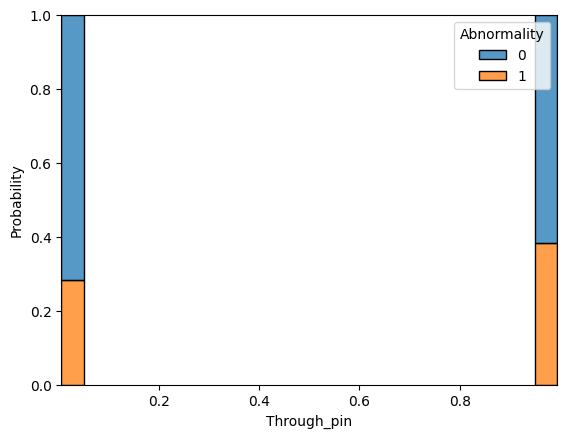

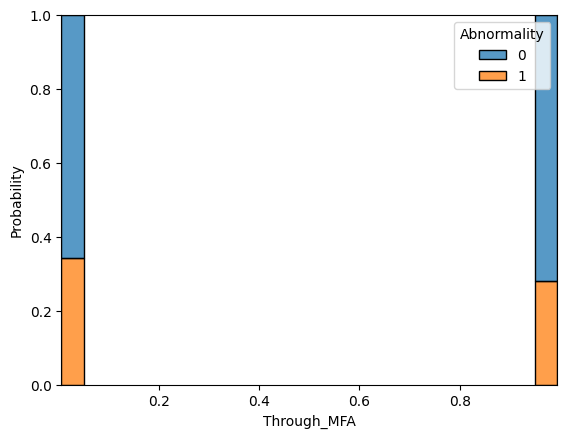

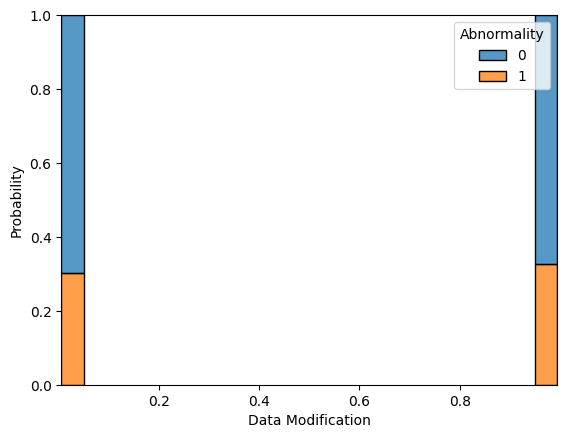

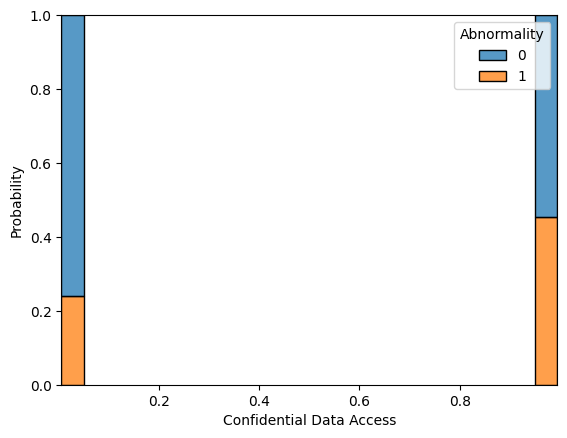

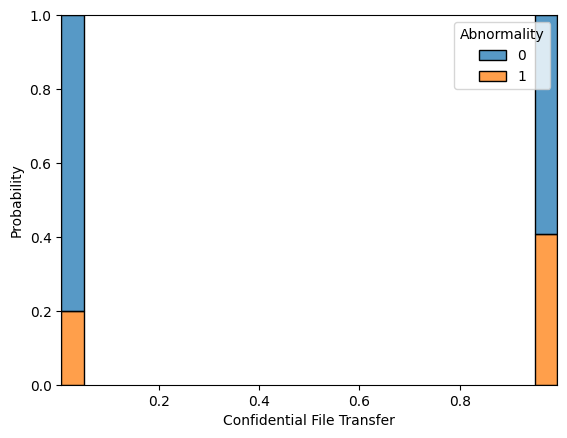

In [23]:
for col in ['Authority', 'File Operation', 'Data Sensitivity Level', 'External Destination', 'Through_pwd', 'Through_pin', 'Through_MFA', 'Data Modification', 'Confidential Data Access', 'Confidential File Transfer']:
    plt.figure()
    sns.histplot(df, x=col, hue="Abnormality", stat="probability", multiple="fill", shrink=.8)

# Data Preprocessing and Model Creation/Training

In [24]:
# Data Preprocessing

# Separate features and target variable
X = df.drop(columns=['id', 'Abnormality'])
y = df['Abnormality']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with median
num_imputer = SimpleImputer(strategy="median")
X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = num_imputer.transform(X_val[numeric_cols])

# Fill missing values for categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
X_val[categorical_cols] = cat_imputer.transform(X_val[categorical_cols])

# Convert dates if present
if 'date' in X_train.columns:
    X_train['date'] = pd.to_datetime(X_train['date'], errors='coerce').apply(lambda x: x.toordinal() if pd.notnull(x) else np.nan)
    X_val['date'] = pd.to_datetime(X_val['date'], errors='coerce').apply(lambda x: x.toordinal() if pd.notnull(x) else np.nan)

# Apply OneHotEncoder for categorical features
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = onehot_encoder.fit_transform(X_train[categorical_cols])
X_val_encoded = onehot_encoder.transform(X_val[categorical_cols])

# Drop original categorical columns and add encoded columns
X_train = X_train.drop(columns=categorical_cols).join(pd.DataFrame(X_train_encoded, index=X_train.index))
X_val = X_val.drop(columns=categorical_cols).join(pd.DataFrame(X_val_encoded, index=X_val.index))

# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)

# Final check for NaNs after encoding
X_train = pd.DataFrame(X_train).fillna(0)
X_val = pd.DataFrame(X_val).fillna(0)

# Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [25]:
# Train Isolation Forest Model
isolation_forest = IsolationForest(
    n_estimators=1000,
    max_samples=0.8,
    contamination=0.2,
    max_features=0.75,
    random_state=42
)
isolation_forest.fit(X_train)

IsolationForest(contamination=0.2, max_features=0.75, max_samples=0.8,
                n_estimators=1000, random_state=42)

In [26]:
# Predict
y_train_pred = isolation_forest.predict(X_train)
y_val_pred = isolation_forest.predict(X_val)

# Convert predictions to binary labels (1 for anomalies, 0 for normal)
y_train_pred_binary = [1 if pred == -1 else 0 for pred in y_train_pred]
y_val_pred_binary = [1 if pred == -1 else 0 for pred in y_val_pred]

In [27]:
# Training Set Evaluation
print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred_binary, target_names=["Normal", "Anomalous"]))

# Validation Set Evaluation
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred_binary, target_names=["Normal", "Anomalous"]))

Training Set Evaluation:
              precision    recall  f1-score   support

      Normal       0.69      0.81      0.75     23885
   Anomalous       0.34      0.22      0.27     10963

    accuracy                           0.62     34848
   macro avg       0.52      0.51      0.51     34848
weighted avg       0.58      0.62      0.59     34848

Validation Set Evaluation:
              precision    recall  f1-score   support

      Normal       0.71      0.82      0.76      6082
   Anomalous       0.33      0.21      0.26      2630

    accuracy                           0.63      8712
   macro avg       0.52      0.51      0.51      8712
weighted avg       0.59      0.63      0.61      8712



# Auto-encoder Anomaly Detection Model

In [61]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

**Preprocessing**

In [63]:
# Load the dataset
data = pd.read_csv('Data_Leakage_Detection.csv')

# Preprocessing
num_cols = data.select_dtypes(include=['float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [64]:
# Impute missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

data[num_cols] = imputer_num.fit_transform(data[num_cols])
data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])

**Model**

In [65]:
# Encode categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [66]:
# Features and target
X = data.drop(columns=['Abnormality', 'id', 'date'])
y = data['Abnormality']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
# Train only on normal data
X_normal = X_scaled[y == 0]
X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

In [68]:
# Autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = 6

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

**Train**

In [69]:
# Train the autoencoder
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(X_val, X_val),
    verbose=1
)

Epoch 1/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.0518 - val_loss: 0.7788
Epoch 2/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7579 - val_loss: 0.7137
Epoch 3/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7053 - val_loss: 0.6836
Epoch 4/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6797 - val_loss: 0.6627
Epoch 5/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6601 - val_loss: 0.6487
Epoch 6/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6455 - val_loss: 0.6371
Epoch 7/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6352 - val_loss: 0.6280
Epoch 8/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6267 - val_loss: 0.6207
Epoch 9/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6215 - val_loss: 0.6147
Epoch 10/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6138 - val_loss: 0.6098
Epoch 11/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6100 - val_loss: 0.6055
Epoch 12/50
853/853 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [70]:
# Evaluate the reconstruction error
train_loss = autoencoder.evaluate(X_train, X_train, verbose=0)
val_loss = autoencoder.evaluate(X_val, X_val, verbose=0)

print(f"Reconstruction Loss on Training Data: {train_loss:.4f}")
print(f"Reconstruction Loss on Validation Data: {val_loss:.4f}")

Reconstruction Loss on Training Data: 0.5829
Reconstruction Loss on Validation Data: 0.5827


In [72]:
# Compute reconstruction error for all data
reconstructed = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.square(X_scaled - reconstructed), axis=1)

# Assign labels: 0 = normal, 1 = anomaly
threshold = np.percentile(reconstruction_error[y == 0], 95)  # 95th percentile of normal data errors
y_pred = (reconstruction_error > threshold).astype(int)

# Evaluate with metrics
print("Classification Report:")
print(classification_report(y, y_pred))

# Compute AUC-ROC score
auc_score = roc_auc_score(y, reconstruction_error)
print(f"AUC-ROC Score: {auc_score:.4f}")

1547/1547 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.95      0.80     34105
           1       0.29      0.04      0.08     15395

    accuracy                           0.67     49500
   macro avg       0.49      0.50      0.44     49500
weighted avg       0.56      0.67      0.57     49500

AUC-ROC Score: 0.5289
